In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
os.environ["KAGGLE_CONFIG_DIR"] = "."

In [4]:
!kaggle competitions download -c udea-ai4eng-20242

 45% 9.00M/20.1M [00:00<00:00, 75.6MB/s]
100% 20.1M/20.1M [00:00<00:00, 122MB/s] 


In [5]:
!unzip udea-ai4eng-20242

Archive:  udea-ai4eng-20242.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [76]:
d = pd.read_csv("train.csv")
d.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [ ]:
d.tail()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo
692499,933374,20195,PSICOLOGIA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Más de 30 horas,Estrato 4,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No,alto


In [29]:
# non-null entries per column in the DataFrame
d.count()

,0
ID,692500
PERIODO,692500
ESTU_PRGM_ACADEMICO,692500
ESTU_PRGM_DEPARTAMENTO,692500
ESTU_VALORMATRICULAUNIVERSIDAD,686213
ESTU_HORASSEMANATRABAJA,661643
FAMI_ESTRATOVIVIENDA,660363
FAMI_TIENEINTERNET,665871
FAMI_EDUCACIONPADRE,669322
FAMI_EDUCACIONMADRE,668836


**Counting and displaying unique values per column**

In [116]:
# Create a DataFrame with unique values and their counts
UNI_COUNT_PER_COL = d.apply(lambda col: pd.Series({
    'UNIQUE VALUES': col.unique(),
    'COUNT': len(col.unique())
}))

# Display the information
print(UNI_COUNT_PER_COL)


                                                              ID  \
UNIQUE VALUES  [904256, 645256, 308367, 470353, 989032, 65987...   
COUNT                                                     692500   

                                                         PERIODO  \
UNIQUE VALUES  [20212, 20203, 20195, 20183, 20194, 20213, 201...   
COUNT                                                          9   

                                             ESTU_PRGM_ACADEMICO  \
UNIQUE VALUES  [ENFERMERIA, DERECHO, MERCADEO Y PUBLICIDAD, A...   
COUNT                                                        948   

                                          ESTU_PRGM_DEPARTAMENTO  \
UNIQUE VALUES  [BOGOTÁ, ATLANTICO, SANTANDER, ANTIOQUIA, HUIL...   
COUNT                                                         31   

                                  ESTU_VALORMATRICULAUNIVERSIDAD  \
UNIQUE VALUES  [5.5-7, 2.5-4, 4-5.5, >7, 1-2.5, 0.5-1, <0.5, ...   
COUNT                                       

**Plotting the value counts for some columns to visualize the distribution of predominant results**




<Axes: xlabel='RENDIMIENTO_GLOBAL'>

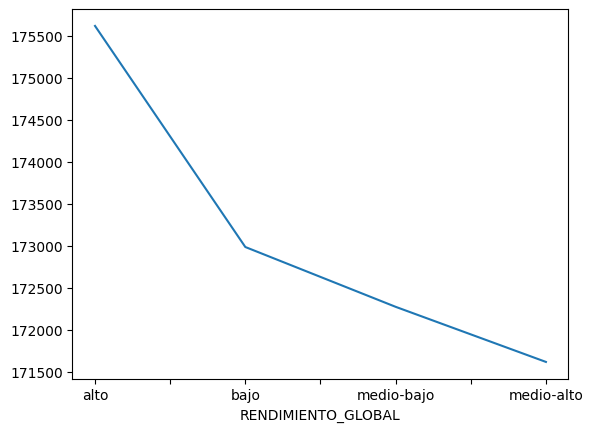

In [10]:
d.RENDIMIENTO_GLOBAL.value_counts().plot()

In [77]:
pd.unique(d['ESTU_HORASSEMANATRABAJA'])

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', nan], dtype=object)

In [78]:
#Use replace to map and change category names to shorter ones
DICT_H_TRAB = {"0":"0h","Menos de 10 horas":"<10h", "Entre 11 y 20 horas":"11-20h",
               "Entre 21 y 30 horas":"21-30h", "Más de 30 horas": ">30h"}
d['ESTU_HORASSEMANATRABAJA'] = d['ESTU_HORASSEMANATRABAJA'].replace(DICT_H_TRAB)

<Axes: xlabel='ESTU_HORASSEMANATRABAJA'>

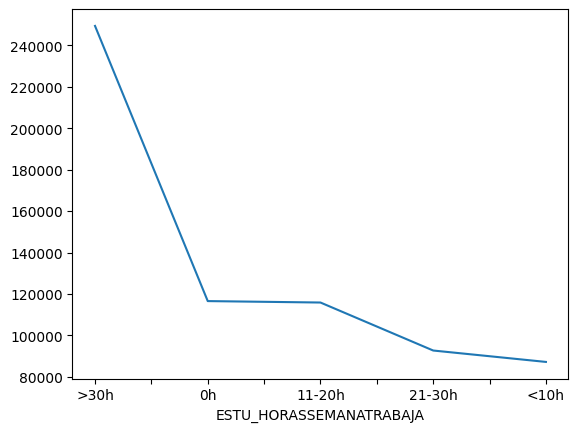

In [79]:
d.ESTU_HORASSEMANATRABAJA.value_counts().plot()

<Axes: xlabel='FAMI_ESTRATOVIVIENDA'>

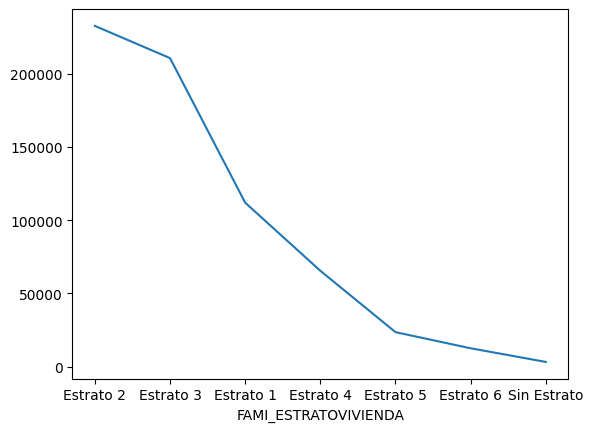

In [80]:
d.FAMI_ESTRATOVIVIENDA.value_counts().plot()


<Axes: xlabel='FAMI_TIENEINTERNET'>

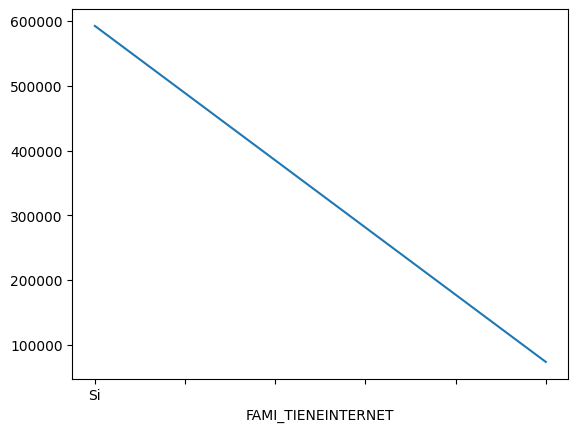

In [81]:
d.FAMI_TIENEINTERNET.value_counts().plot()

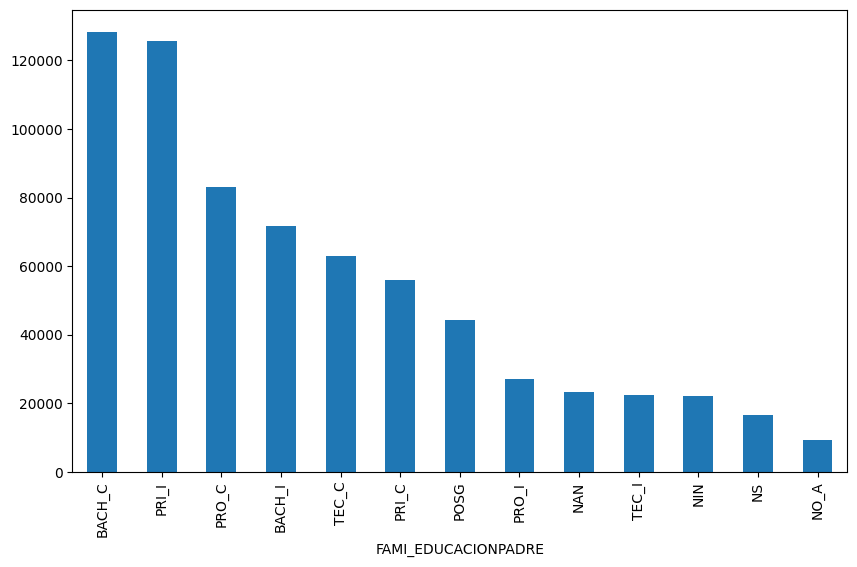

In [103]:
DICT_ED_PADRE_KEYS =pd.unique(d['FAMI_EDUCACIONPADRE'])
DICT_ED_PADRE_VALUES = ['TEC_I', 'TEC_C', 'BACH_C', 'NS', 'PRI_C', 'PRO_C', 'PRO_I', 'PRI_I', 'POSG', 'NAN', 'BACH_I', 'NIN', 'NO_A']
#zip creates tuples, which are converted into a dictionary using dict
DICT_ED_PADRE = dict(zip(DICT_ED_PADRE_KEYS, DICT_ED_PADRE_VALUES))
d['FAMI_EDUCACIONPADRE']= d['FAMI_EDUCACIONPADRE'].replace(DICT_ED_PADRE)
V_P = d.FAMI_EDUCACIONPADRE.value_counts()
ax = V_P.plot(kind='bar', figsize=(10, 6))

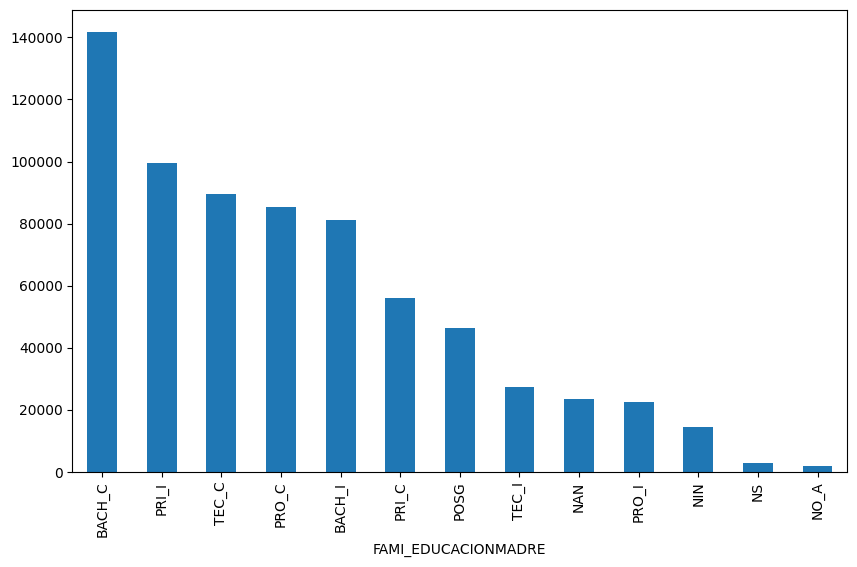

In [104]:
DICT_ED_MADRE_KEYS =pd.unique(d['FAMI_EDUCACIONMADRE'])
DICT_ED_MADRE_VALUES = ['POSG', 'TEC_I', 'BACH_C', 'PRI_C', 'TEC_C', 'BACH_I', 'PRO_I', 'PRO_C', 'PRI_I', 'NAN', 'NIN', 'NO_A', 'NS']
DICT_ED_MADRE = dict(zip(DICT_ED_MADRE_KEYS, DICT_ED_MADRE_VALUES))
d['FAMI_EDUCACIONMADRE']= d['FAMI_EDUCACIONMADRE'].replace(DICT_ED_MADRE)
V_M = d.FAMI_EDUCACIONMADRE.value_counts()
ax = V_M.plot(kind='bar', figsize=(10, 6))


<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

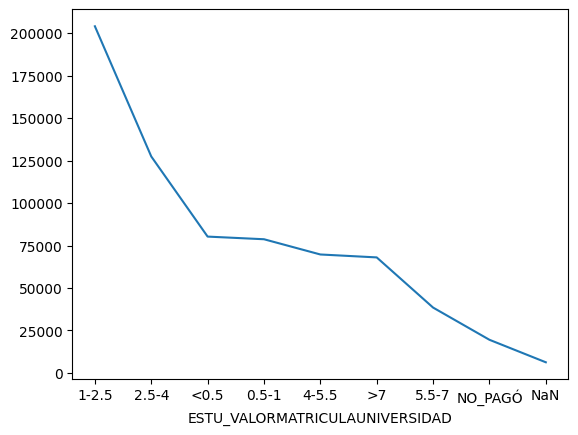

In [114]:
DICT_VAL_MATRI_KEYS =pd.unique(d['ESTU_VALORMATRICULAUNIVERSIDAD'])
DICT_VAL_MATRI_VALUES = ['5.5-7', '2.5-4', '4-5.5', '>7', '1-2.5', '0.5-1', '<0.5', 'NO_PAGÓ', 'NaN']
DICT_VAL_MATRI = dict(zip(DICT_VAL_MATRI_KEYS, DICT_VAL_MATRI_VALUES))
d['ESTU_VALORMATRICULAUNIVERSIDAD']= d['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(DICT_VAL_MATRI)
d.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot()

**Additional Interesting Counts**

In [119]:
#See how many students took the test in each department
d['ESTU_PRGM_DEPARTAMENTO'].value_counts()

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


In [ ]:
#count the total of null values per colum
for col in d.columns:
  print(col, np.sum(pd.isnull(d[col])))

ID 0
PERIODO 0
ESTU_PRGM_ACADEMICO 0
ESTU_PRGM_DEPARTAMENTO 0
ESTU_VALORMATRICULAUNIVERSIDAD 6287
ESTU_HORASSEMANATRABAJA 30857
FAMI_ESTRATOVIVIENDA 32137
FAMI_TIENEINTERNET 26629
FAMI_EDUCACIONPADRE 23178
FAMI_EDUCACIONMADRE 23664
ESTU_PAGOMATRICULAPROPIO 6498
RENDIMIENTO_GLOBAL 0


In [121]:
#Use groupby to observe patterns across different columns
REND_ACD_PRG_DEP = d.groupby(['ESTU_PRGM_ACADEMICO','RENDIMIENTO_GLOBAL', "ESTU_PRGM_DEPARTAMENTO"]).size()
REND_ACD_PRG_DEP

ESTU_PRGM_ACADEMICO                             RENDIMIENTO_GLOBAL  ESTU_PRGM_DEPARTAMENTO
3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES  alto                ANTIOQUIA                 11
                                                bajo                ANTIOQUIA                 21
                                                medio-alto          ANTIOQUIA                 16
                                                medio-bajo          ANTIOQUIA                 21
ACTIVIDAD FISICA Y DEPORTE                      alto                ANTIOQUIA                 13
                                                                                              ..
ZOOTECNIA                                       medio-bajo          NORTE SANTANDER           71
                                                                    RISARALDA                 49
                                                                    SANTANDER                 33
                                                                    SUCRE                     21
                                                                    VALLE                     23
Length: 8871, dtype: int64

In [124]:
REND_ESTRATO = d.groupby(["FAMI_ESTRATOVIVIENDA","RENDIMIENTO_GLOBAL"]).size()
REND_ESTRATO

FAMI_ESTRATOVIVIENDA  RENDIMIENTO_GLOBAL
Estrato 1             alto                  14363
                      bajo                  42388
                      medio-alto            23643
                      medio-bajo            31597
Estrato 2             alto                  45948
                      bajo                  63068
                      medio-alto            59536
                      medio-bajo            64119
Estrato 3             alto                  59121
                      bajo                  42756
                      medio-alto            56841
                      medio-bajo            51967
Estrato 4             alto                  28624
                      bajo                   9064
                      medio-alto            16154
                      medio-bajo            11672
Estrato 5             alto                  12415
                      bajo                   2731
                      medio-alto             5112
                      medio-bajo             3350
Estrato 6             alto                   7648
                      bajo                   1287
                      medio-alto             2314
                      medio-bajo             1356
Sin Estrato           alto                    588
                      bajo                   1436
                      medio-alto              579
                      medio-bajo              686
dtype: int64

In [125]:
REND_HORA_TRABAJO = d.groupby(["ESTU_HORASSEMANATRABAJA","RENDIMIENTO_GLOBAL"]).size()
REND_HORA_TRABAJO

ESTU_HORASSEMANATRABAJA  RENDIMIENTO_GLOBAL
0h                       alto                  45754
                         bajo                  18959
                         medio-alto            28900
                         medio-bajo            22937
11-20h                   alto                  27554
                         bajo                  32019
                         medio-alto            27400
                         medio-bajo            28884
21-30h                   alto                  20926
                         bajo                  24483
                         medio-alto            22968
                         medio-bajo            24316
<10h                     alto                  23358
                         bajo                  25434
                         medio-alto            18757
                         medio-bajo            19642
>30h                     alto                  50989
                         bajo                  62742
                         medio-alto            66102
                         medio-bajo            69519
dtype: int64